It's a data visualization library to understand about data

In [1]:
import pandas as pd

In [2]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy

In [3]:
df_1 = pd.read_excel('./online_retail_II.xlsx', sheet_name='Year 2009-2010')

In [4]:
df_2 = pd.read_excel('./online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [5]:
df = pd.concat([df_1, df_2], ignore_index=True)

In [6]:
print(df.shape)
print(df.columns)

(1067371, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [9]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


Cleaning & Feature Engineering

In [10]:
df = df.dropna(subset=['InvoiceDate', 'Customer ID'])

In [11]:
print (df.shape)

(824364, 8)


In [19]:
~df['Invoice'].astype(str).str.startswith('C')

0          True
1          True
2          True
3          True
4          True
           ... 
1067366    True
1067367    True
1067368    True
1067369    True
1067370    True
Name: Invoice, Length: 824364, dtype: bool

In [20]:
df = df[~df['Invoice'].astype(str).str.startswith('C')]

In [21]:
print(df.shape)

(805620, 8)


In [22]:
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

In [23]:
print(df.shape)

(805549, 8)


In [24]:
805620 - 805549

71

In [25]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [26]:
df['Revenue'] = df['Quantity'] * df['Price']

In [27]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [28]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [30]:
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)

In [31]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


In [35]:
monthly_revenue = df.groupby('Month')['Revenue'].sum().sort_index()

In [36]:
monthly_revenue

Month
2009-12     686654.160
2010-01     557319.062
2010-02     506371.066
2010-03     699608.991
2010-04     594609.192
2010-05     599985.790
2010-06     639066.580
2010-07     591636.740
2010-08     604242.650
2010-09     831615.001
2010-10    1036680.000
2010-11    1172336.042
2010-12     884591.890
2011-01     569445.040
2011-02     447137.350
2011-03     595500.760
2011-04     469200.361
2011-05     678594.560
2011-06     661213.690
2011-07     600091.011
2011-08     645343.900
2011-09     952838.382
2011-10    1039318.790
2011-11    1161817.380
2011-12     518210.790
Name: Revenue, dtype: float64

Let's start Matplotlib

In [37]:
import matplotlib.pyplot as plt

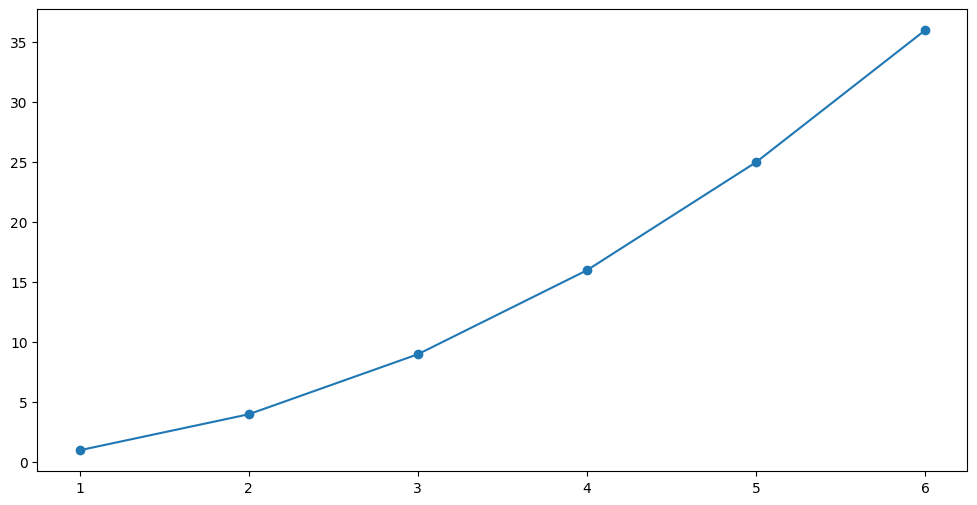

In [43]:
plt.figure(figsize=(12, 6))
plt.plot([1, 2, 3, 4, 5, 6], [1, 4, 9, 16, 25, 36], marker="o")
plt.show()

In [72]:
monthly_revenue.index

Index(['2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
       '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11',
       '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'],
      dtype='object', name='Month')

In [73]:
monthly_revenue.values

array([ 686654.16 ,  557319.062,  506371.066,  699608.991,  594609.192,
        599985.79 ,  639066.58 ,  591636.74 ,  604242.65 ,  831615.001,
       1036680.   , 1172336.042,  884591.89 ,  569445.04 ,  447137.35 ,
        595500.76 ,  469200.361,  678594.56 ,  661213.69 ,  600091.011,
        645343.9  ,  952838.382, 1039318.79 , 1161817.38 ,  518210.79 ])

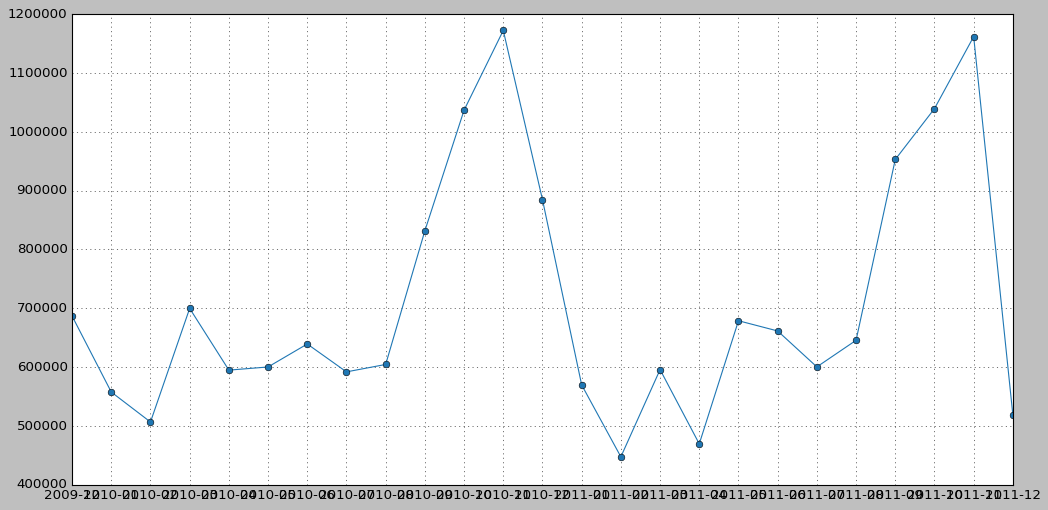

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker="o")
plt.show()

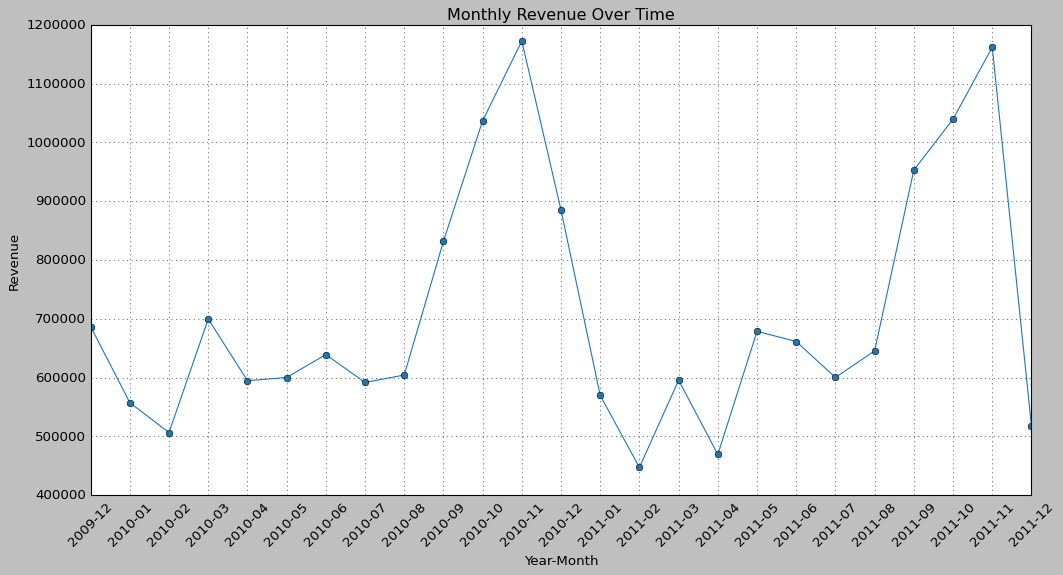

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker="o")
plt.xticks(rotation=45)
plt.title('Monthly Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [76]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


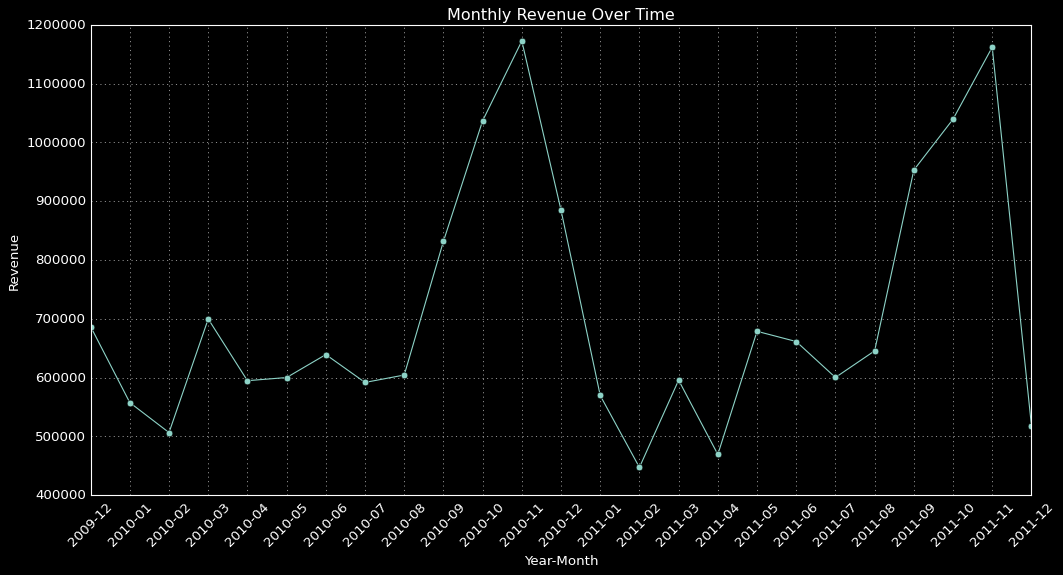

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker="o")
plt.xticks(rotation=45)
plt.style.use('_mpl-gallery') # Added Style
plt.title('Monthly Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

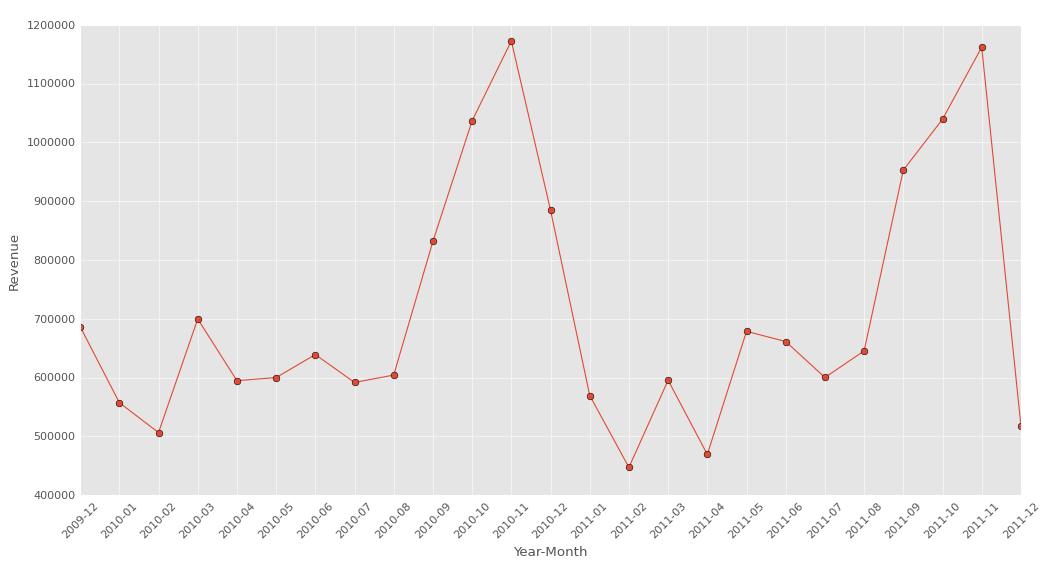

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker="o")
plt.xticks(rotation=45)
plt.style.use('_mpl-gallery')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.savefig("monthly_revenue_plot.png", dpi=300) # Save Figure

In [90]:
for i, value in enumerate(monthly_revenue.values):
    print (i, value)

0 686654.16
1 557319.062
2 506371.066
3 699608.991
4 594609.192
5 599985.79
6 639066.58
7 591636.74
8 604242.65
9 831615.001
10 1036680.0
11 1172336.042
12 884591.89
13 569445.04
14 447137.35
15 595500.76
16 469200.361
17 678594.56
18 661213.69
19 600091.011
20 645343.9
21 952838.382
22 1039318.79
23 1161817.3800000001
24 518210.79


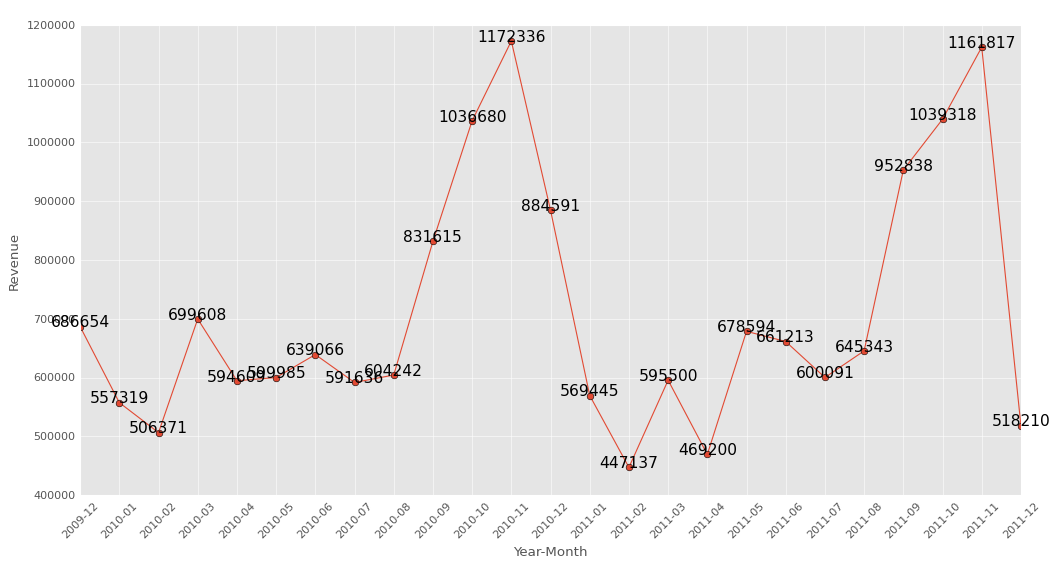

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.title('Monthly Revenue Over Time')

for i, value in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], value, f"{int(value)}", ha='center', fontsize=14, color='black')


plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True) 
plt.show()

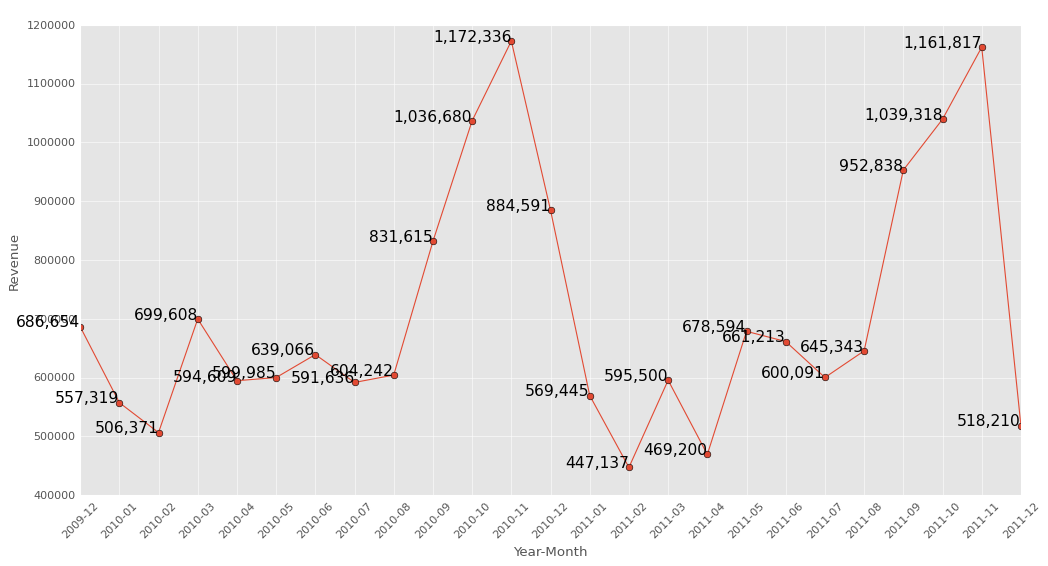

In [113]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.title('Monthly Revenue Over Time')

for i, value in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], value, f"{int(value):,}", ha='right', fontsize=14, color='black')


plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True) 
plt.show()

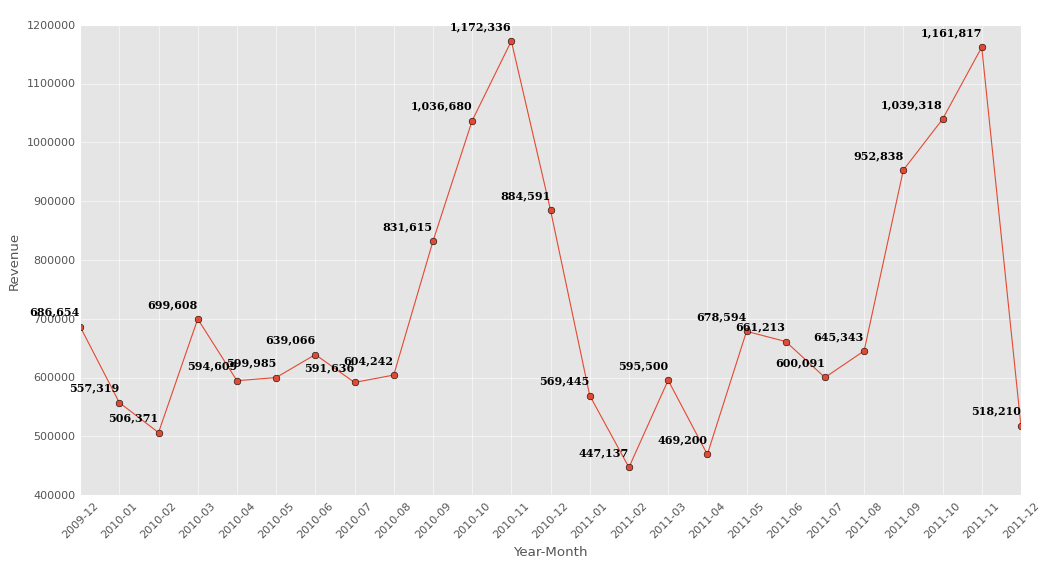

In [ ]:
font = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 10,
}

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.title('Monthly Revenue Over Time')

for i, value in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], value+20000, f"{int(value):,}", fontdict=font, ha='right')


plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [115]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12


In [116]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

In [117]:
country_revenue

Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.003653e+05
Sweden            9.154972e+04
Denmark           6.986219e+04
Name: Revenue, dtype: float64

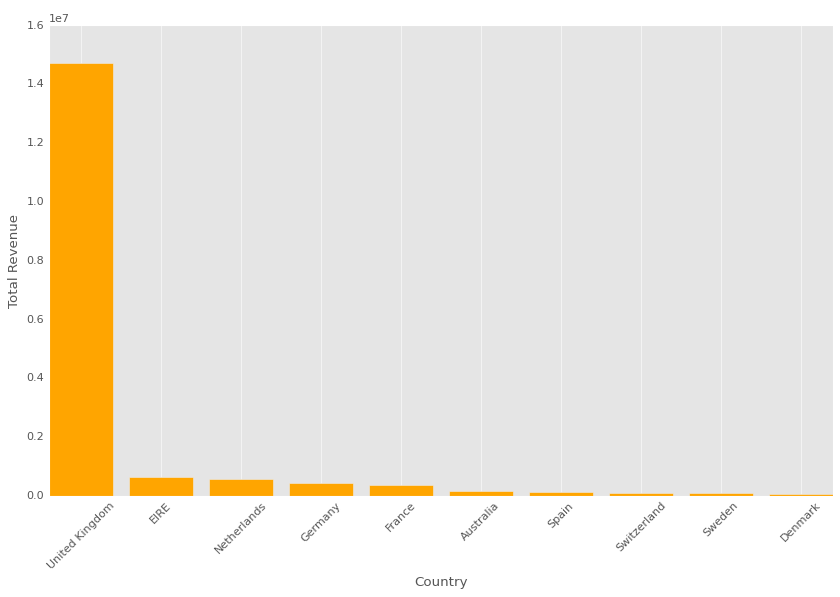

In [118]:
plt.figure(figsize=(10, 6))

plt.bar(country_revenue.index, country_revenue.values, color='orange')

plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

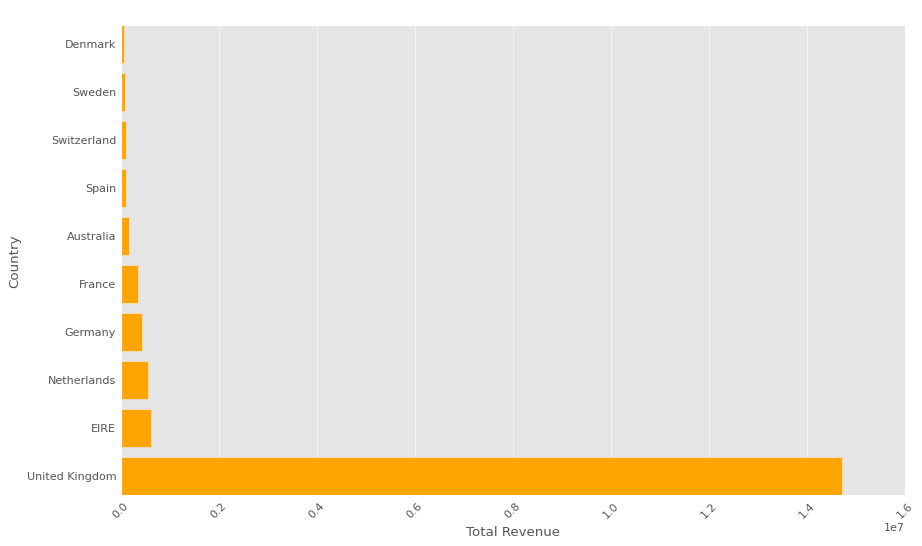

In [121]:
plt.figure(figsize=(10, 6))

plt.barh(country_revenue.index, country_revenue.values, color='orange')

plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

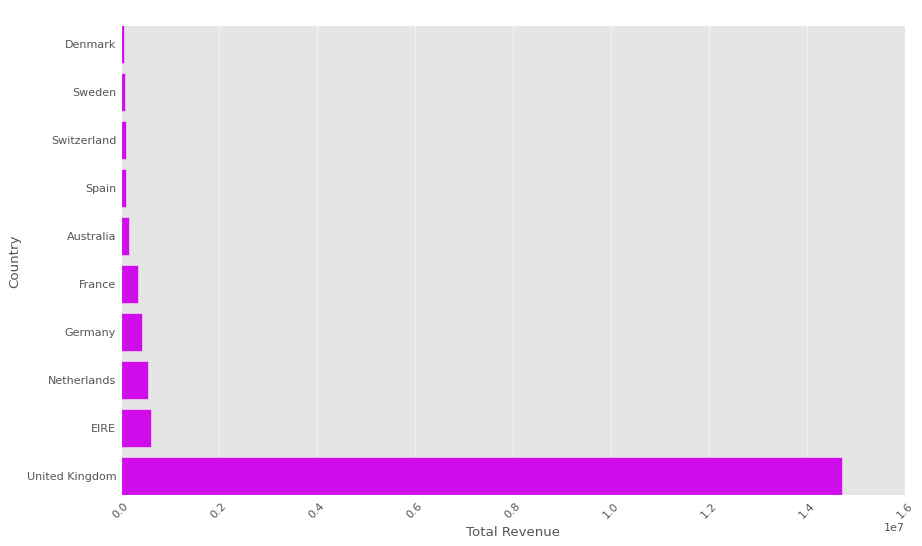

In [125]:
plt.figure(figsize=(10, 6))

plt.barh(country_revenue.index, country_revenue.values, color="#D10CEB")

plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()